In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/full_bfo_ufc_espn_data_clean.csv", parse_dates=["Date", "DOB", "DOB_opp"])
df.head()

,fight_id,Date,Opponent,FighterResult,Decision,Rnd,Time,Event,OpponentID,FighterID,...,max_weight,prev_weight,espn_fighter_id_opp,n_career_fights_opp,n_ufc_fights_opp,t_since_first_fight_opp,t_since_prev_fight_opp,min_weight_opp,max_weight_opp,prev_weight_opp
0,1991-09-26_unknown_unknown,1991-09-26,Marcelo Mendes,W,TKO (Injury),1,4:42,Desafio: Jiu-Jitsu vs. Luta Livre,NaN,NaN,...,185.0,NaN,2558095,0,0,0,NaN,185.0,185.0,NaN
1,1992-01-01_/fighters/Renzo-Gracie-1658_unknown,1992-01-01,Renzo Gracie,L,Submission (Rear Naked Choke),1,7:03,Desafio: Gracie Vale Tudo,/fighters/Renzo-Gracie-1658,NaN,...,185.0,NaN,2354119,0,0,0,NaN,185.0,185.0,NaN
2,1993-08-29_unknown_unknown,1993-08-29,Moura Moura,W,Submission (Strikes),1,2:46,CP X CB: Capoeira vs. Chute Boxe,NaN,NaN,...,170.0,NaN,3107994,0,0,0,NaN,170.0,170.0,NaN
3,1993-09-21_/fighters/Ken-Shamrock-552_/fighter...,1993-09-21,Ken Shamrock,L,Submission (Rear Naked Choke),1,6:15,"Pancrase: Yes, We Are Hybrid Wrestlers 1",/fighters/Ken-Shamrock-552,/fighters/Masakatsu-Funaki-642,...,185.0,NaN,2335653,0,0,0,NaN,185.0,185.0,NaN
4,1993-10-14_/fighters/Ken-Shamrock-552_unknown,1993-10-14,Kazuo Takahashi,W,Submission (Heel Hook),1,12:23,"Pancrase: Yes, We Are Hybrid Wrestlers 2",NaN,/fighters/Ken-Shamrock-552,...,265.0,185.0,2431322,0,0,0,NaN,265.0,265.0,NaN


In [2]:
stat_landed_cols = [
    'SCBL', 'SCHL', 'SCLL', 'SGBL', 'SGHL', 'SGLL', 'SDBL', 'SDHL', 'SDLL',
    'SHL', 'SBL', 'SLL', 'SDL', 'SCL', 'SGL', 'SSL', 'TSL', 'TDL',
]

stat_failed_cols = [
    'SM_fail', 'SS_fail', 'TS_fail', 'TD_fail', 'SCB_fail', 'SCH_fail',
    'SCL_fail', 'SGB_fail', 'SGH_fail', 'SGL_fail', 'SDB_fail', 'SDH_fail',
    'SDL_fail', 'SH_fail', 'SB_fail', 'SL_fail', 'SD_fail', 'SC_fail',
    'SG_fail',
]

misc_stat_cols = [
    'KD', 'RV', 'AD', 'ADTB', 'ADHG', 'ADTM', 'ADTS', 'ctrl_seconds', 
]

diff_cols = []
for stat_col in stat_landed_cols + stat_failed_cols + misc_stat_cols:
    diff_col = f"diff_sqrt_{stat_col}"
    df[diff_col] = np.sqrt(df[stat_col]) - np.sqrt(df[stat_col+"_opp"])
    diff_cols.append(diff_col)
    
df[diff_cols].isnull().mean()

diff_sqrt_SCBL            0.936985
diff_sqrt_SCHL            0.936985
diff_sqrt_SCLL            0.936985
diff_sqrt_SGBL            0.936985
diff_sqrt_SGHL            0.936985
diff_sqrt_SGLL            0.936985
diff_sqrt_SDBL            0.936985
diff_sqrt_SDHL            0.936985
diff_sqrt_SDLL            0.936985
diff_sqrt_SHL             0.859759
diff_sqrt_SBL             0.859759
diff_sqrt_SLL             0.859759
diff_sqrt_SDL             0.859759
diff_sqrt_SCL             0.859759
diff_sqrt_SGL             0.859759
diff_sqrt_SSL             0.859628
diff_sqrt_TSL             0.859628
diff_sqrt_TDL             0.859628
diff_sqrt_SM_fail         0.859628
diff_sqrt_SS_fail         0.859628
diff_sqrt_TS_fail         0.859628
diff_sqrt_TD_fail         0.859628
diff_sqrt_SCB_fail        0.936985
diff_sqrt_SCH_fail        0.936985
diff_sqrt_SCL_fail        0.936985
diff_sqrt_SGB_fail        0.936985
diff_sqrt_SGH_fail        0.936985
diff_sqrt_SGL_fail        0.936985
diff_sqrt_SDB_fail  

In [3]:
from model.mma_features import PcaEloWrapper, BinaryEloWrapper

pca_ew = PcaEloWrapper(n_pca=10, target_cols=diff_cols, alpha=0.5)
pca_elo_feat_df = pca_ew.fit_transform_all(df)
pca_elo_feat_df

getting elo features for PC_0


100%|██████████████████████████████████████| 1643/1643 [00:05<00:00, 316.44it/s]


getting elo features for PC_1


100%|██████████████████████████████████████| 1643/1643 [00:04<00:00, 359.66it/s]


getting elo features for PC_2


100%|██████████████████████████████████████| 1643/1643 [00:04<00:00, 329.23it/s]


getting elo features for PC_3


100%|██████████████████████████████████████| 1643/1643 [00:05<00:00, 319.72it/s]


getting elo features for PC_4


100%|██████████████████████████████████████| 1643/1643 [00:05<00:00, 300.94it/s]


getting elo features for PC_5


100%|██████████████████████████████████████| 1643/1643 [00:05<00:00, 284.38it/s]


getting elo features for PC_6


100%|██████████████████████████████████████| 1643/1643 [00:05<00:00, 299.64it/s]


getting elo features for PC_7


100%|██████████████████████████████████████| 1643/1643 [00:04<00:00, 340.15it/s]


getting elo features for PC_8


100%|██████████████████████████████████████| 1643/1643 [00:04<00:00, 367.03it/s]


getting elo features for PC_9


100%|██████████████████████████████████████| 1643/1643 [00:05<00:00, 310.65it/s]


,espn_fight_id,pred_PC_0,pred_PC_1,pred_PC_2,pred_PC_3,pred_PC_4,pred_PC_5,pred_PC_6,pred_PC_7,pred_PC_8,pred_PC_9
0,1991-09-26_2354059_2558095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1992-01-01_2354119_2501396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1993-08-29_2354132_3107994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993-09-21_2335653_2557846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1993-10-14_2335653_2431322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
60933,2022-05-20_4878653_4935217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60934,2022-05-20_3083637_4372268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60935,2022-05-20_3074829_4030352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60936,2022-05-20_3026393_4247604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# defining some binary features
df["win_target"] = df["FighterResult"].replace({"W":1, "L":0, "D":np.nan})

fight_finish = df["decision_clean"].isin(["submission", "tko/ko"]).replace({True:1, False:np.nan})
df["fighter_finish"] = fight_finish * df["win_target"]

In [5]:
elo_alphas = {
    "win_target": 0.9, "fighter_finish": 0.9,
}
bin_ew = BinaryEloWrapper(elo_alphas)
bin_elo_feat_df = bin_ew.fit_transform_all(df)
bin_elo_feat_df

getting elo features for win_target


100%|███████████████████████████████████| 60938/60938 [00:32<00:00, 1857.02it/s]


getting elo features for fighter_finish


100%|███████████████████████████████████| 60938/60938 [00:30<00:00, 1977.57it/s]


,espn_fight_id,pred_win_target,pred_win_target_logit,pred_fighter_finish,pred_fighter_finish_logit
0,1991-09-26_2354059_2558095,0.500000,0.000000,0.500000,0.000000
1,1992-01-01_2354119_2501396,0.500000,0.000000,0.500000,0.000000
2,1993-08-29_2354132_3107994,0.500000,0.000000,0.500000,0.000000
3,1993-09-21_2335653_2557846,0.500000,0.000000,0.500000,0.000000
4,1993-10-14_2335653_2431322,0.556014,0.225000,0.556014,0.225000
...,...,...,...,...,...
60933,2022-05-20_4878653_4935217,0.514409,0.057653,0.599474,0.403274
60934,2022-05-20_3083637_4372268,0.348645,-0.624999,0.376407,-0.504826
60935,2022-05-20_3074829_4030352,0.840012,1.658320,0.710930,0.899907
60936,2022-05-20_3026393_4247604,0.326619,-0.723516,0.524476,0.097981


In [6]:
sm_finish = df["decision_clean"] == "submission"
sm_landed_fighter  = (sm_finish & (df["FighterResult"] == "W")).astype(int)
df["SML"] = sm_landed_fighter
df["SMA"] = np.maximum(df["SM"], df["SML"])

sm_landed_opponent = (sm_finish & (df["FighterResult"] == "L")).astype(int)
df["SML_opp"] = sm_landed_opponent
df["SMA_opp"] = np.maximum(df["SM_opp"], df["SML_opp"])

In [7]:
from model.mma_features import AccEloWrapper

elo_alphas = {
    ("SML", "SMA"): 0.5, # submission offense, submission defense
    ("TDL", "TDA"): 0.5, # takedown offense, takedown defense
    ("KD", "SSL"): 0.5, # offense = KD power, defense = strength of your jaw
    ("TDS", "TDL"): 0.5, # slam rate
}
acc_ew = AccEloWrapper(elo_alphas)
acc_elo_feat_df = acc_ew.fit_transform_all(df)
acc_elo_feat_df

getting elo features for SML/SMA


100%|██████████████████████████████████████| 3099/3099 [00:16<00:00, 185.64it/s]


getting elo features for TDL/TDA


100%|██████████████████████████████████████| 3099/3099 [00:17<00:00, 181.91it/s]


getting elo features for KD/SSL


100%|██████████████████████████████████████| 3099/3099 [00:16<00:00, 183.12it/s]


getting elo features for TDS/TDL


100%|██████████████████████████████████████| 2457/2457 [00:13<00:00, 184.42it/s]


,espn_fight_id,pred_p_SML_SMA_diff,pred_logit_p_SML_SMA_diff,pred_p_TDL_TDA_diff,pred_logit_p_TDL_TDA_diff,pred_p_KD_SSL_diff,pred_logit_p_KD_SSL_diff,pred_p_TDS_TDL_diff,pred_logit_p_TDS_TDL_diff
0,1991-09-26_2354059_2558095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1992-01-01_2354119_2501396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1993-08-29_2354132_3107994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1993-09-21_2335653_2557846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1993-10-14_2335653_2431322,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
60933,2022-05-20_4878653_4935217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60934,2022-05-20_3083637_4372268,-0.027032,-0.108234,0.142027,0.608124,0.020156,0.081550,-0.048427,-0.195906
60935,2022-05-20_3074829_4030352,0.000000,0.000000,0.363148,1.746860,-0.035588,-0.142716,0.000000,0.000000
60936,2022-05-20_3026393_4247604,-0.046303,-0.185389,-0.058199,-0.233992,0.043118,0.174359,-0.052853,-0.211953


In [8]:
# pca_elo_feat_df.shape, df.shape
feat_df = df.dropna(subset=["p_fighter_open_implied"]).copy()
feat_df["log_height_diff"] = (
    np.log(feat_df["HeightInches"]) - np.log(feat_df["HeightInches_opp"])
).fillna(0) # if missing from either fighter, impute with 0
feat_df["log_reach_diff"] = (
    np.log(feat_df["ReachInches"]) - np.log(feat_df["ReachInches_opp"])
).fillna(0) # if missing from either fighter, impute with 0
feat_df["age_diff"] = (feat_df["DOB"] - feat_df["DOB_opp"]).dt.days.fillna(0)
feat_df["t_since_last_fight_log_diff"] = (
    # if it's the first fight, impute with mean
    np.log(np.maximum(1, feat_df['t_since_prev_fight'].fillna(258))) - 
    np.log(np.maximum(1, feat_df['t_since_prev_fight_opp'].fillna(258)))
)

feat_df["log_t_since_first_fight_diff"] = (
    np.log(np.maximum(1, feat_df['t_since_first_fight'])) - 
    np.log(np.maximum(1, feat_df['t_since_first_fight_opp']))
)
feat_df["sqrt_n_career_fights_diff"] = (
    np.sqrt(feat_df["n_career_fights"]) - np.sqrt(feat_df["n_career_fights_opp"])
)

feat_df["min_weight_diff"] = (
    np.log(feat_df["min_weight"]) - np.log(feat_df["min_weight_opp"])
).fillna(0)

feat_df = feat_df.merge(
    pca_elo_feat_df, on="espn_fight_id", how="left",
).merge(
    bin_elo_feat_df, on="espn_fight_id", how="left"
).merge(
    acc_elo_feat_df, on="espn_fight_id", how="left"
)

feat_cols = [
    "log_height_diff", 
    "log_reach_diff", 
    "age_diff", 
    # "t_since_last_fight_log_diff", 
    "sqrt_n_career_fights_diff",
    "log_t_since_first_fight_diff",
    "min_weight_diff",
    # binary elo cols
    "pred_win_target_logit",
    "pred_fighter_finish_logit",
    # pca elo cols
    'pred_PC_0', 'pred_PC_1', 'pred_PC_2', 'pred_PC_3',
    'pred_PC_4', 'pred_PC_5', 'pred_PC_6', 'pred_PC_7', 'pred_PC_8',
#     'pred_PC_9', 
#     'pred_PC_10', 'pred_PC_11', 'pred_PC_12', 'pred_PC_13',
#     'pred_PC_14', 'pred_PC_15',
    # acc elo cols
    'pred_logit_p_SML_SMA_diff', 
    'pred_logit_p_TDL_TDA_diff',
    'pred_logit_p_KD_SSL_diff', 'pred_logit_p_TDS_TDL_diff',
]

misc_cols = [
    "espn_fight_id",
    "espn_fighter_id",
    "espn_opponent_id",
    "Date",
    "FighterResult",
    "win_target",
    "p_fighter_open_implied",
    "p_fighter_close_implied",
    "FighterOpen", 
    "OpponentOpen",
]

feat_df = feat_df[misc_cols + feat_cols]
feat_df.isnull().mean()

espn_fight_id                   0.000000
espn_fighter_id                 0.000000
espn_opponent_id                0.000000
Date                            0.000000
FighterResult                   0.000000
win_target                      0.017045
p_fighter_open_implied          0.000000
p_fighter_close_implied         0.000000
FighterOpen                     0.000000
OpponentOpen                    0.000000
log_height_diff                 0.000000
log_reach_diff                  0.000000
age_diff                        0.000000
sqrt_n_career_fights_diff       0.000000
log_t_since_first_fight_diff    0.000000
min_weight_diff                 0.000000
pred_win_target_logit           0.000000
pred_fighter_finish_logit       0.000000
pred_PC_0                       0.000000
pred_PC_1                       0.000000
pred_PC_2                       0.000000
pred_PC_3                       0.000000
pred_PC_4                       0.000000
pred_PC_5                       0.000000
pred_PC_6       

In [9]:
feat_df["Date"].max()

Timestamp('2022-05-14 00:00:00')

In [10]:
from model.mma_log_reg_stan import SimpleSymmetricModel

mod = SimpleSymmetricModel(feat_cols=feat_cols, target_col="win_target", 
                           p_fighter_implied_col="p_fighter_open_implied",
                           beta_prior_std=1.0, mcmc=False)
# y_hat = mod.fit_predict(train_df, test_df)
# y_hat.shape

In [11]:
from model_selection.cross_val_pipeline import TimeSeriesCrossVal

tscv = TimeSeriesCrossVal(min_test_date=pd.to_datetime("2021-01-01"), 
                          n_dates_per_fold=1, 
                          p_fighter_implied_col="p_fighter_open_implied")
preds_df = tscv.get_cross_val_preds(mod, feat_df.dropna(subset=["win_target"]))

training on date range: 2007-06-16 2020-12-31
Initial log joint probability = -19245.5
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      18      -5607.71    0.00016696     0.0510932      0.9718      0.9718       20   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2021-01-16
Initial log joint probability = -16348.2
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      17      -5614.57   0.000440109     0.0712148           1           1       20   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2021-01-20
Initial log joint probability = -19702.4
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19      -5620.82   0.000185426     0.0636778           1           1   

Initial log joint probability = -21284.6
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19      -5708.16   0.000261323     0.0576295      0.9014      0.9014       22   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2021-03-26
Initial log joint probability = -20666.3
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      18      -5709.83   0.000227665     0.0771037           1           1       20   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2021-03-27
Initial log joint probability = -25165.7
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19      -5716.29   0.000251613      0.278883           1           1       21   
    Iter      log prob        ||dx||

Initial log joint probability = -17121.3
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      18       -5812.6   0.000222708      0.111596           1           1       22   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2021-05-15
Initial log joint probability = -21548
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19      -5820.06   0.000108676     0.0847249      0.3545      0.9652       22   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2021-05-21
Initial log joint probability = -25363.5
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19       -5834.7   5.25084e-05      0.345128      0.2312      0.2312       23   
    Iter      log prob        ||dx||  

Initial log joint probability = -19430.2
training on date range:    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      17      -5950.94   0.000391966      0.138167      0.8364      0.8364       20   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
 2007-06-16 2021-07-24
Initial log joint probability = -16512.7
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19      -5957.96   0.000249071      0.143174           1           1       22   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      20      -5957.96   0.000117153      0.125166      0.8523      0.8523       23   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2021-07-25
Initial log joint probability = -14851.7
    Iter      log prob        ||dx||

Initial log joint probability = -21664.3
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19      -6051.02   0.000362161     0.0960137           1           1       21   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2021-09-18
Initial log joint probability = -20691.8
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19      -6066.04   0.000102756      0.107173      0.3563           1       23   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2021-09-21
Initial log joint probability = -19618.4
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      17      -6068.81   0.000308371      0.136455           1           1       19   
Optimization terminated normally: 
 

Initial log joint probability = -15157.4
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      17      -6156.48   6.88618e-05     0.0812917       0.419      0.9917       22   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2021-11-05
Initial log joint probability = -20749.1
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19      -6164.93    0.00012431      0.373888      0.5463      0.5463       21   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      20      -6164.93   0.000122469     0.0570969           1           1       22   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2021-11-06
Initial log joint probability = -21234.8
    Iter      log prob        ||dx||

Initial log joint probability = -19459.9
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19       -6253.3   9.70818e-05      0.363812      0.3685      0.3685       22   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      20       -6253.3   0.000149748     0.0319947           1           1       23   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2022-01-21
Initial log joint probability = -19327.4
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      18      -6257.63    0.00018126      0.137305      0.7412      0.7412       20   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2022-01-22
Initial log joint probability = -22146
    Iter      log prob        ||dx||  

Initial log joint probability = -16720.1
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      18       -6374.6   0.000138732     0.0656281           1           1       21   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2022-04-01
Initial log joint probability = -19199.2
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      17      -6376.79   0.000117904      0.161506      0.3817           1       20   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
training on date range: 2007-06-16 2022-04-02
Initial log joint probability = -18229.9
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      19      -6384.34   0.000121099      0.305055      0.4764      0.4764       21   
    Iter      log prob        ||dx||

In [12]:
(preds_df["y_pred"].round() == preds_df["win_target"]).mean()

0.6871621621621622

In [13]:
(preds_df["p_fighter_open_implied"].round() == preds_df["win_target"]).mean()

0.6641891891891892

In [14]:
from sklearn.metrics import log_loss

xce = log_loss(y_true=preds_df["win_target"], y_pred=preds_df["y_pred"])
xce_ml = log_loss(y_true=preds_df["win_target"], y_pred=preds_df["p_fighter_open_implied"])

print(f"model log loss: {xce}")
print(f"opening money line log loss: {xce_ml}")

model log loss: 0.5904826562460117
opening money line log loss: 0.6066279494650436


# messing around

* Okay, so despite being the representative for jiu jitsu in the UFC, and having a ton of wins by submission, charles oliveira has surprisingly bad submission defense. He's been choked out by some serious cheapos. 
* ngannou with the N-bombs
* israel adesanya's mainly a striker. He doesn't have much takedown accuracy, and never seems to bother with it. But he's got surprisingly good takedown defense. 
* yoel romero, despite having a bronze olympic medal in wrestling, and despite beating the GOAT cael sanderson, isn't all that great at wrestling in mma! 

idk, a lot of this is just because i picked a smoothing constant of 0.5. There's an obvious way to optimize this - just pick whichever constant maximizes classification accuracy.

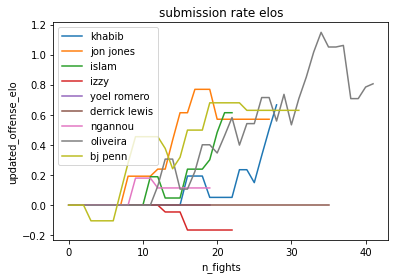

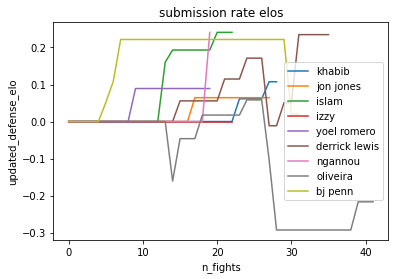

In [15]:
espn_fighter_ids = {
    "khabib": 2611557,
    "jon jones": 2335639, 
    "islam": 3332412,
    "izzy": 4285679,
    "yoel romero": 2569939,
    "derrick lewis": 2560713,
    "ngannou": 3933168,
    "oliveira": 2504169,
    "bj penn": 2335629,
}

for y in ["updated_offense_elo", "updated_defense_elo"]:
    for name, fighter_id in espn_fighter_ids.items():
        curr_fighter_df = acc_ew.fitted_elo_estimators["SML_SMA"].get_fighter_career_elos(fighter_id)
        sns.lineplot(x="n_fights", y=y, label=name, data=curr_fighter_df)
    plt.title("submission rate elos")
    plt.show()

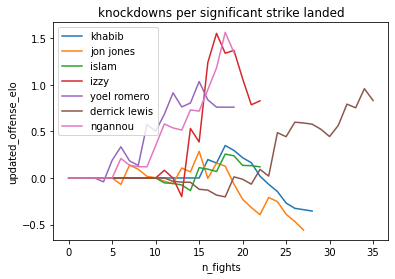

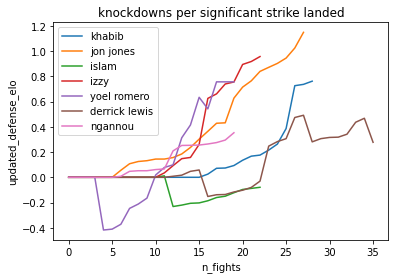

In [16]:
espn_fighter_ids = {
    "khabib": 2611557,
    "jon jones": 2335639, 
    "islam": 3332412,
    "izzy": 4285679,
    "yoel romero": 2569939,
    "derrick lewis": 2560713,
    "ngannou": 3933168,
}

for y in ["updated_offense_elo", "updated_defense_elo"]:
    for name, fighter_id in espn_fighter_ids.items():
        curr_fighter_df = acc_ew.fitted_elo_estimators["KD_SSL"].get_fighter_career_elos(fighter_id)
        sns.lineplot(x="n_fights", y=y, label=name, data=curr_fighter_df)
    plt.title("knockdowns per significant strike landed")
    plt.show()

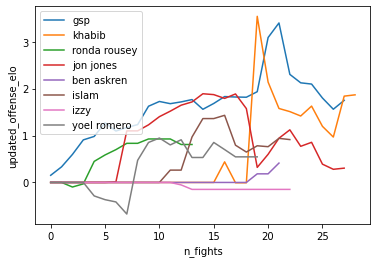

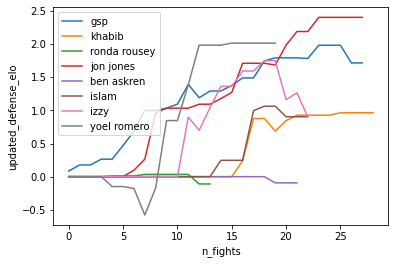

In [17]:
espn_fighter_ids = {
    "gsp": 2335659,
    "khabib": 2611557,
    "ronda rousey": 2563796,
    "jon jones": 2335639, 
    "ben askren": 2500597,
    "islam": 3332412,
    "izzy": 4285679,
    "yoel romero": 2569939,
}

for y in ["updated_offense_elo", "updated_defense_elo"]:
    for name, fighter_id in espn_fighter_ids.items():
        curr_fighter_df = acc_ew.fitted_elo_estimators["TDL_TDA"].get_fighter_career_elos(fighter_id)
        sns.lineplot(x="n_fights", y=y, label=name, data=curr_fighter_df)
    plt.show()

In [18]:
np.arange(0, 1, 0.05)[1:]

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [19]:
np.linspace(0.25, 1, 6)[1:-1]

array([0.4 , 0.55, 0.7 , 0.85])

In [20]:
np.linspace(6, 15, 4)

array([ 6.,  9., 12., 15.])